# 1.4 Modelagem de peptídeos totalmente atômicos

>### Although the nature of non-bonded atomic and molecular interactions is known in principle, semiclassical models of proteins differ not only in the parametrization of the potentials, but also in the form of the effective energetic contributions. 

>> The problem which is common to most all-atom approaches is that these models are often gauged against a subset of the protein data bank (pdb) [10][link text](http://www.rcsb.org/).

>> Within this subset, these models can be applied with some success to structure predictions. 

>### In structural predictions for sequences not in the gauge set, these models often fail. 

>### *A frequent feature of such models is, for example, the overweighting of a certain type of secondary structures, either helices or strands.

>### *Another general problem is the enormous complexity of these models and the huge parameter sets, resulting in slow dynamics in computer simulations. 

>### This is particularly apparent in molecular dynamics simulations of protein folding ranging from extremely (CPU) time-consuming to simply impossible. 

>## Reasonable results can currently only be obtained in computer simulations of small peptides – but the understanding of their folding and aggregation behaviors could actually be the key to deeper insights into generic aspects of structure formation of large bioproteins.

>>### In standard peptide models, all atoms and covalent bonds, bond and torsion angles of the molecule are assigned individual parameters mimicking quantum-mechanical effects.

>### Examples of such parameters are van der Waals radii and partial charges of the atoms, lengths of covalent bonds between atoms, angles between successive covalent bonds, torsional angles and torsional barriers. 

>### Atomic parameters typically depend on the position of the respective atom in the amino acid and the chemical composition of the amino acid residue, even different parametrizations of the same type of atom are distinguished. 

>### One such an example is hydrogen, whose energetic properties depend on the chemical group it belongs to (e.g., if it is part of an aliphatic, aromatic, hydroxylic or carboxylic, amide or amine group, bound to sulfur or to $C^{\delta}$ of proline).

>>## In such models, each atom $i$, located at the position $\vec{r}_i$, carries a partial charge $q_i$ .

>### Covalent bonds between atoms, according to the chemical structure of the amino acids, are considered rigid, i.e., bond lengths are kept constant, as well as bond angles between covalent bonds, and certain rigid torsion angles. 

>### In some models, this constraint is weakened by allowing the bonds and bond angles to fluctuate slightly.

>>### Distances between non-bonded atoms $i$ and $j$ are defined as $r_{ij}=|\vec{r}_i-\vec{r}_j|$ and measured in $Å$ in the following. 

>### The set of degrees of freedom covers all dihedral torsion angles $\vec{ξ}=\{ξ_α\}$ of $αth$ residue’s backbone $(\phi_{\alpha} , \psi_{\alpha}, \omega{\alpha} )$ and side chain $(\vec{χ} = χ^{(1)}_{\alpha}, χ^{(2)}_{\alpha} , . . .)$.



>### The model incorporates electrostatic Coulomb interactions between the partial atomic charges (all energies in kcal/mole)(The dielectric constant of water at room temperature is ε ≈ 80.), 

\begin{equation}
E_c(\vec{\xi})=332 \sum_{i,j}\frac{q_i q_j}{\varepsilon r_{ij}(\vec{\xi})}
\end{equation}






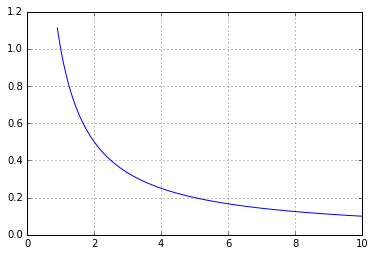

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
%matplotlib inline

r = np.linspace(0.9, 10, 100)
Ec=1/r
fig = plt.figure()
plt.grid(True)
plt.plot(r, Ec, '-')


effective atomic dipole-dipole interaction modeled via Lennard-Jones potentials

\begin{equation}
E_{LJ}(\vec{\xi})=\sum_{i,j}\left(
\frac{A_{ij}}{r^{12}_{ij}(\vec{\xi})}-\frac{B_{ij}}{r^{6}_{ij}(\vec{\xi})}
\right)
\end{equation}



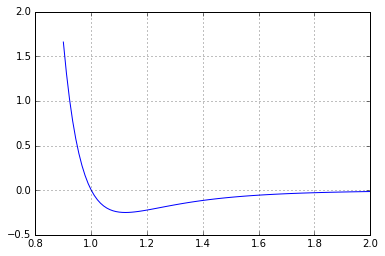

In [29]:
r = np.linspace(0.9, 2, 100)
ELJ=(1/np.power(r,12)-1/np.power(r,6))
fig = plt.figure()
plt.grid(True)
plt.plot(r, ELJ, '-')


O-H and N-H hydrogen-bond formation,

\begin{equation}
E_{HB}(\vec{\xi})=\sum_{i,j}\left(
\frac{C_{ij}}{r^{12}_{ij}(\vec{\xi})}-\frac{D_{ij}}{r^{10}_{ij}(\vec{\xi})}
\right)
\end{equation}



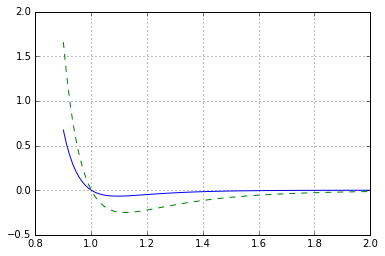

In [30]:
r = np.linspace(0.9, 2, 100)
EHB=(1/np.power(r,12)-1/np.power(r,10))
fig = plt.figure()
plt.grid(True)
plt.plot(r, EHB, '-')
plt.plot(r, ELJ, '--')

and considers dihedral torsional barriers (if any):

\begin{equation}
E_{tor}(\vec{\xi})=\sum_{l}
U_l (1\pm\cos(n_l\xi_l))
\end{equation}



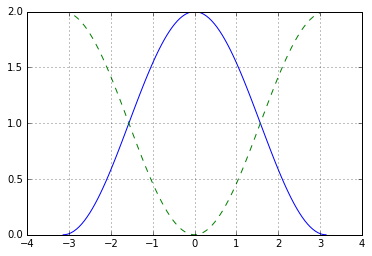

In [36]:
xi = np.linspace(-np.pi, np.pi, 100)
Etor=1.0+np.cos(xi)
Etor1=1.0-np.cos(xi)
fig = plt.figure()
plt.grid(True)
plt.plot(xi, Etor, '-')
plt.plot(xi, Etor1, '--')


The total energy of a conformation, whose structure is completely defined by the set of dihedral angles $\vec{\xi}$, is

\begin{equation}
E_{0}(\vec{\xi})=E_c(\vec{\xi})+E_{LJ}(\vec{\xi})+E_{HB}(\vec{\xi})+E_{tor}(\vec{\xi})
\end{equation}


>### The hundreds of parameters $q_i$, $A_{ij}$, $B_{ij}$, $C_{ij}$ , $D_{ij}$ , $U_l$ , and $n_l$ form a force field.

>### Additional sophisticated model parameter sets must be imposed, if the interaction of the protein with solvent molecules, ions, and counterions shall explicitly be considered. 

>### For simulations in implicit solvent, peptide models can simply be extended by a solvation-energy contribution, which is, e.g., given by [11]


\begin{equation}
E_{solv}(\vec{\xi})=\sum_{i}\sigma_i A_i(\vec{\xi})
\end{equation}

>### where $A_i$ is the solvent-accessible surface area of the $ith$ atom for a given conformation and $σ_i$ is the solvation parameter for the $ith$ atom. 

>### The values for $σ_i$ depend on the type of the $ith$ atom and are parametrized in a separate force field. 

>## The total potential energy of the molecule then reads 

\begin{equation}
E_{tot}(\vec{\xi})=E_{0}(\vec{\xi})+E_{solv}(\vec{\xi})
\end{equation}

>### All force-field based models are inherently problematic, because the attempt to accurately mimick both local and multi-body interactions, that are essentially based on quantum effects, by semiclassical effective interactions must fail, at least in general.

>## In certain cases, an appropriate fine-tuning of the parameter sets is possible and can lead to reasonable results, but employing the same parameter set to a different problem might cause false predictions. 

>### The main reason is that the energetic margins for certain substructures of a protein are so small that ”fine-tuning” of a single interaction and its parameter subset easily unbalances another subset. 

>### The force-field parameters are not independent, because the interactions cannot be decoupled, if their energy scales are of similar magnitude (which for many systems affects almost all energetic contributions in these models). 

>### The interaction with the environment adds to the problem and the computational challenges to simulate these models under the essential influence of thermal fluctuations seems to rule out these modeling attempts completely.

>### Nonetheless, simulations of these models are currently the only way to gain some insight into structural processes and function of proteins and protein complexes at nanoscopic scales. 

>### Optimally, to increase confidence, results obtained with different force fields should be compared with each other, or, if possible, verified by experiments. 

>### The value of this kind of empirical research almost completely relies on redundancy and consistency.
